<a href="https://colab.research.google.com/github/christiandaniel1505/PVCK_GENAP_2022/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# F. TUGAS PRAKTIKUM 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


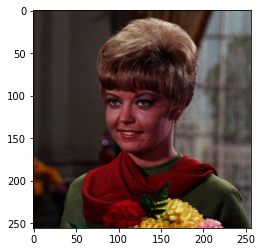

In [ ]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img_f = cv.imread('/content/drive/MyDrive/Images/female.tiff')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

## **1. Buat Gamma Correction sesuai dengan petunjuk berikut**

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan. 

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


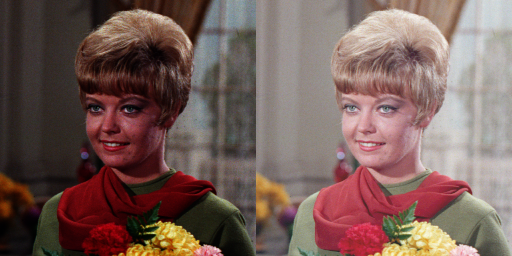

In [ ]:
# prak1
print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

## 2. Buat Simulasi Image Depth

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit).

 Simulasi Image Depth 
----------------------
Masukkan nilai bit depth: 2


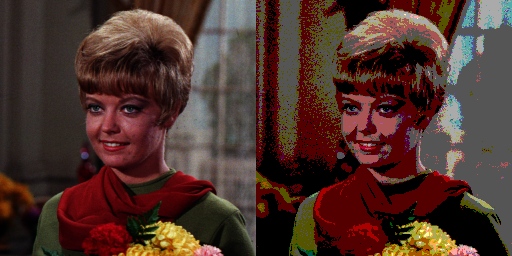

In [ ]:
# prak2
original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

print(' Simulasi Image Depth ')
print('----------------------')
try:
  bd = float(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

## 3. Buat modul Average Denoising

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob). 


### Jumlah Citra di Average 5
Nilai PSNR (dB) = 27.536073966869555 (dB)

Nilai PSNR adalah 27.536073966869555 (dB)


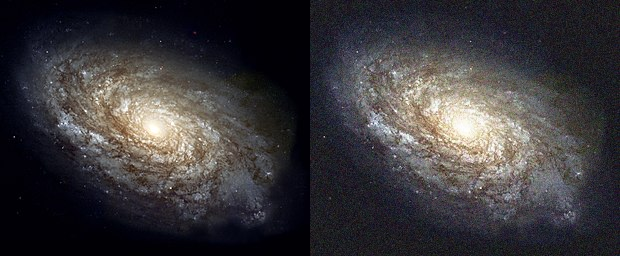

In [ ]:
# prak3.1 (citra : 5)
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

### Jumlah Citra di Average 50
Nilai PSNR (dB) = 27.493689187563255 (dB)

Nilai PSNR adalah 27.493689187563255 (dB)


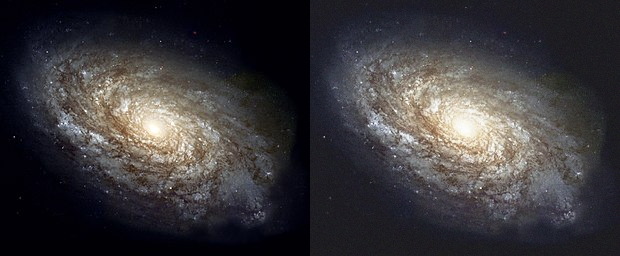

In [ ]:
# prak3.2 (citra : 50)
dst = cv_img[0]
noise_number = 49 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

### Jumlah Citra di Average 80
Nilai PSNR (dB) = 27.50847838662391 (dB)

Nilai PSNR adalah 27.50847838662391 (dB)


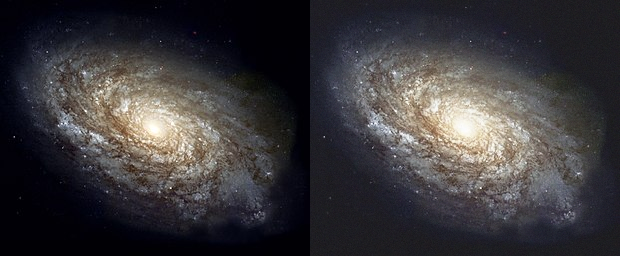

In [ ]:
# prak3.3 (citra : 80)
dst = cv_img[0]
noise_number = 79 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

### Jumlah Citra di Average 100
Nilai PSNR (dB) = 27.514741068934295 (dB)

Nilai PSNR adalah 27.514741068934295 (dB)


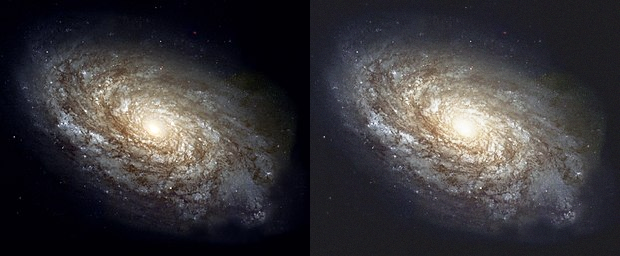

In [ ]:
# prak3.4 (citra : 100)
dst = cv_img[0]
noise_number = 99 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah semakin besar jumlah citra di avarage maka gambar bintik bintik atau noise akan semakin halus

## 4. Buat image masking untuk image berikut.

Image kiri adalah image asli (images/tank.tiff),
image tengah adalah mask, sedangkan image kanan adalah hasilnya: 


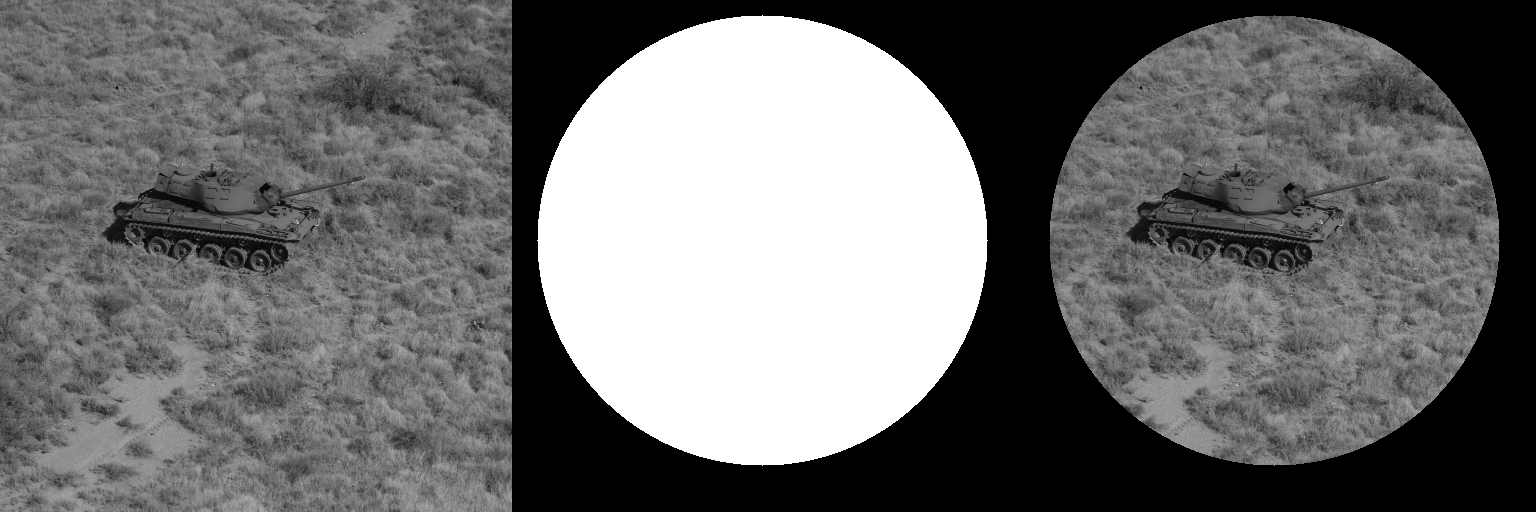

In [ ]:
# prak4
img_tank = cv.imread('/content/drive/MyDrive/Images/tank.tiff')

mask = np.zeros(img_tank.shape, dtype=np.uint8)
mask = cv.circle(mask, (250, 240), 225, (255,255,255), -1)

masked = img_tank & mask

tank_frame = cv.hconcat((img_tank, mask, masked))
cv2_imshow(tank_frame)

## 5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu. 

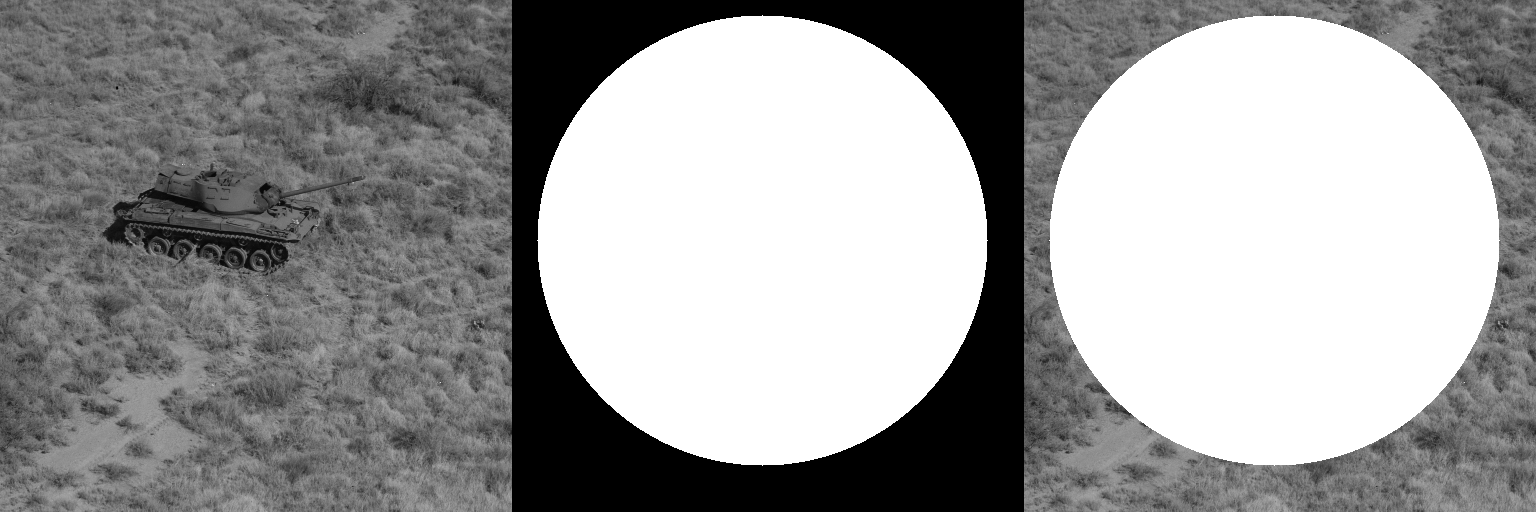

In [ ]:
# prak5.1 OR
img_tank = cv.imread('/content/drive/MyDrive/Images/tank.tiff')

mask = np.zeros(img_tank.shape, dtype=np.uint8)
mask = cv.circle(mask, (250, 240), 225, (255,255,255), -1)

masked = img_tank | mask

tank_frame = cv.hconcat((img_tank, mask, masked))
cv2_imshow(tank_frame)

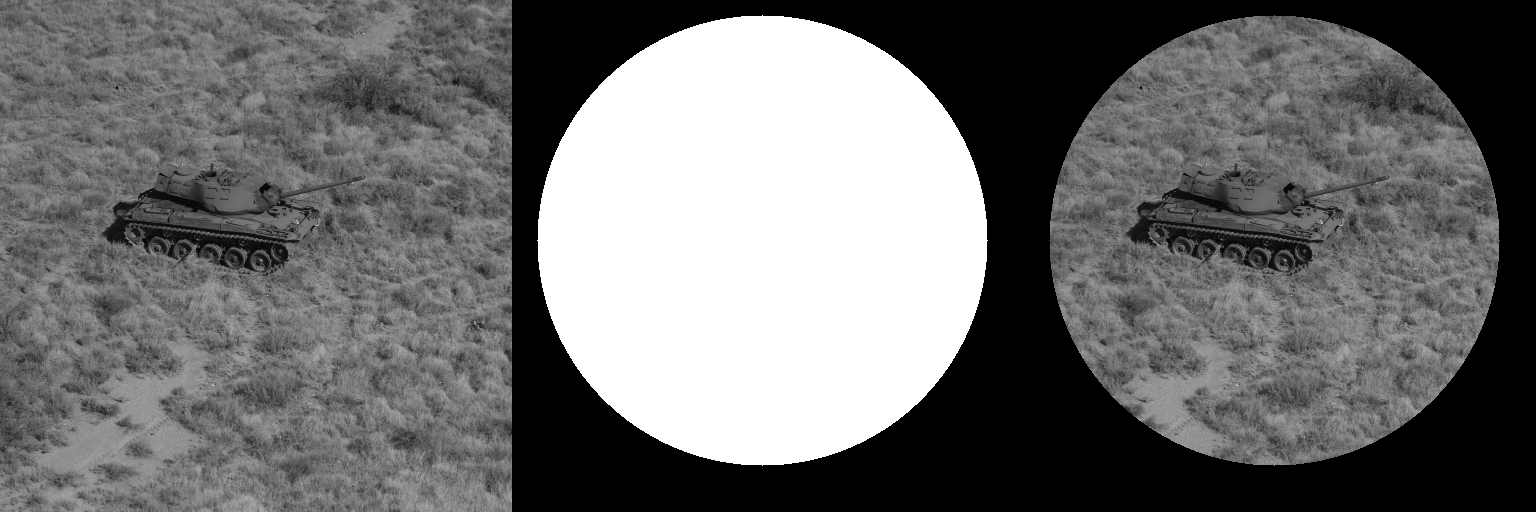

In [ ]:
# prak5.2 AND
img_tank = cv.imread('/content/drive/MyDrive/Images/tank.tiff')

mask = np.zeros(img_tank.shape, dtype=np.uint8)
mask = cv.circle(mask, (250, 240), 225, (255,255,255), -1)

masked = img_tank & mask

tank_frame = cv.hconcat((img_tank, mask, masked))
cv2_imshow(tank_frame)

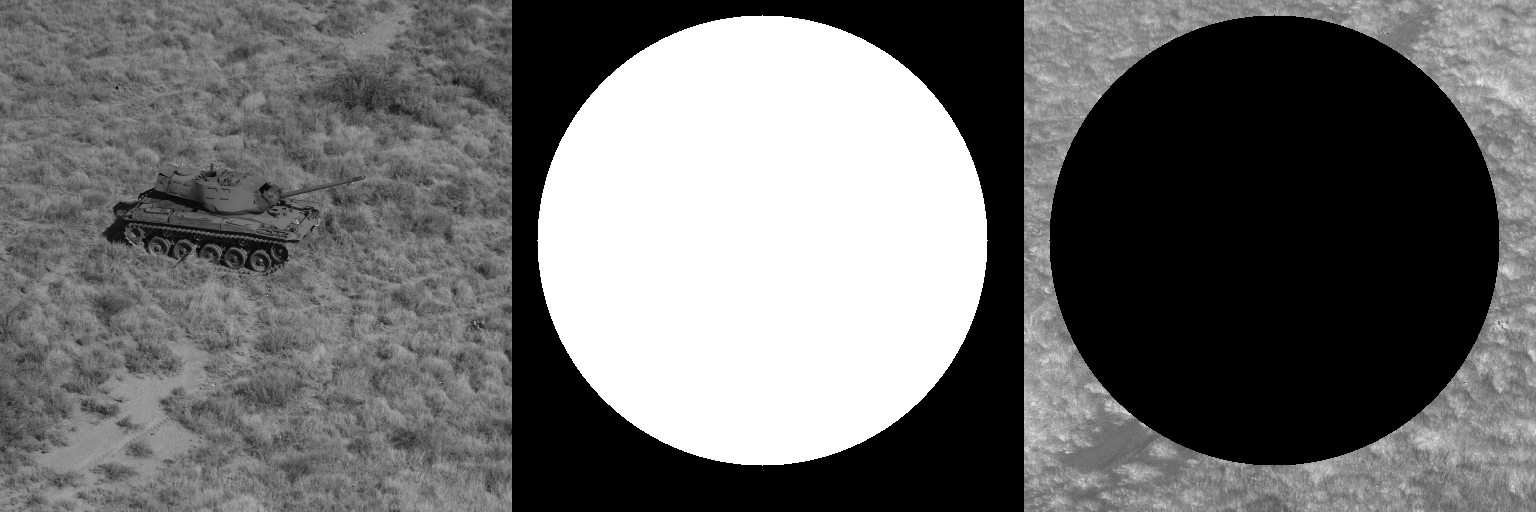

In [ ]:
# prak5.3 NOT
img_tank = cv.imread('/content/drive/MyDrive/Images/tank.tiff')

mask = np.zeros(img_tank.shape, dtype=np.uint8)
mask = cv.circle(mask, (250, 240), 225, (255,255,255), -1)

masked = ~img_tank & ~mask

tank_frame = cv.hconcat((img_tank, mask, masked))
cv2_imshow(tank_frame)